
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


iowa_full = '/Users/claugreco/Documents/GA/datasets/iowa_liquor_sales_proj_2.csv'
iowa_red =  '/Users/claugreco/Documents/GA/datasets/Iowa_Liquor_sales_sample_10pct.csv'

/Users/claugreco/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iowa = pd.read_csv(iowa_red)
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [3]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [5]:
iowa[['Zip Code', 'City']].groupby('Zip Code').count()

,City
Zip Code,
50002,43
50003,318
50006,122
50009,2113
50010,7091
50014,457
50020,149
50021,2527
50022,1045


In [6]:
# Drop 217 observations that have bad 'Zip Code' = 712-2
iowa.drop(iowa[iowa['Zip Code'] == '712-2'].index, inplace=True)     

In [7]:
# 56201 is not a valid zip code for IOWA. Burlington is 52601
iowa['Zip Code'].loc[iowa['Zip Code']== '56201'] = '52601'

/Users/claugreco/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#Convert Datatypes
iowa['Date'] = pd.to_datetime(iowa['Date'], format="%m/%d/%Y")
iowa['Zip Code']= iowa['Zip Code'].apply(str)

In [9]:
#Clean $ symbol and convert to float
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].replace('\$','',regex=True).astype('float')
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].replace('\$','',regex=True).astype('float')
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].replace('\$','',regex=True).astype('float')

In [10]:
#Drop unwanted columns

#Volume sold (gallons), keep volume sold (liters)
iowa.drop(['Volume Sold (Gallons)'], axis = 1, inplace=True)
#Category, keep Category Name
iowa.drop(['Category'], axis=1, inplace=True)

In [11]:
#Check counties
iowa[['County Number','County']].groupby('County Number').count()

,County
County Number,
1.0,585
2.0,234
3.0,1045
4.0,1043
5.0,227
6.0,979
7.0,15083
8.0,2110
9.0,2243


In [12]:
#Drop all na values
iowa = iowa.dropna()

In [13]:
#Create columns for Year, Month, Quarter
iowa['Year'] = iowa.Date.dt.year
iowa['Month'] = iowa.Date.dt.month
iowa['Quarter'] = iowa.Date.dt.quarter

In [14]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year,Month,Quarter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2015,11,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,2016,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,2016,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2016,2,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,2015,8,3


In [15]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269073 entries, 0 to 270954
Data columns (total 19 columns):
Date                    269073 non-null datetime64[ns]
Store Number            269073 non-null int64
City                    269073 non-null object
Zip Code                269073 non-null object
County Number           269073 non-null float64
County                  269073 non-null object
Category Name           269073 non-null object
Vendor Number           269073 non-null int64
Item Number             269073 non-null int64
Item Description        269073 non-null object
Bottle Volume (ml)      269073 non-null int64
State Bottle Cost       269073 non-null float64
State Bottle Retail     269073 non-null float64
Bottles Sold            269073 non-null int64
Sale (Dollars)          269073 non-null float64
Volume Sold (Liters)    269073 non-null float64
Year                    269073 non-null int64
Month                   269073 non-null int64
Quarter                 269073 non-nu

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

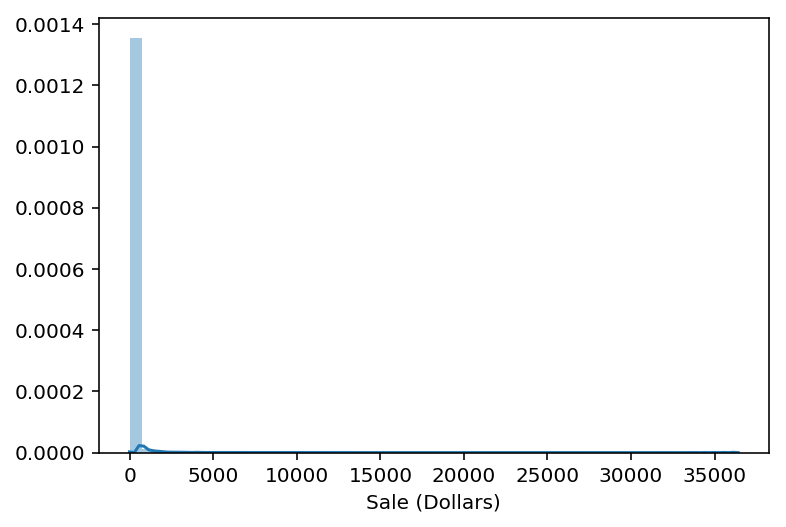

In [16]:
sns.distplot(iowa['Sale (Dollars)']);

In [17]:
#Plot shows outliers 
#Check 
iowa[iowa['Sale (Dollars)'] > 5000].count()

Date                    290
Store Number            290
City                    290
Zip Code                290
County Number           290
County                  290
Category Name           290
Vendor Number           290
Item Number             290
Item Description        290
Bottle Volume (ml)      290
State Bottle Cost       290
State Bottle Retail     290
Bottles Sold            290
Sale (Dollars)          290
Volume Sold (Liters)    290
Year                    290
Month                   290
Quarter                 290
dtype: int64

In [18]:
#Drop 290 observations that are outliers
iowa.drop(iowa[iowa['Sale (Dollars)'] > 5000].index, inplace=True)

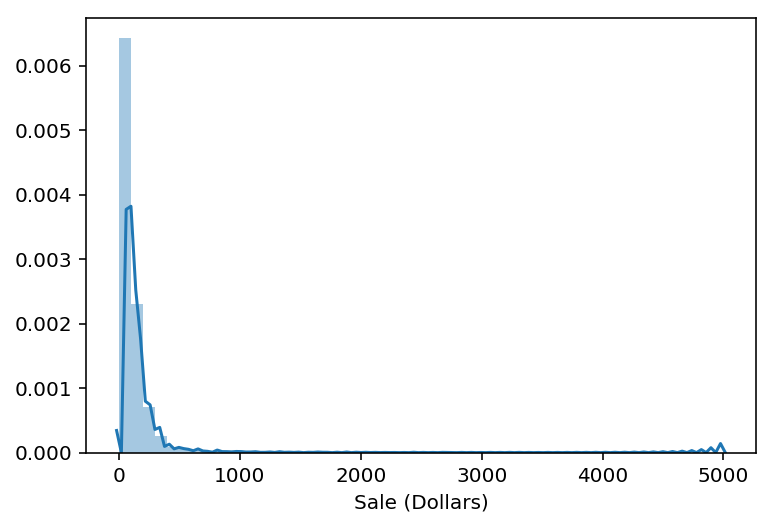

In [19]:
sns.distplot(iowa['Sale (Dollars)']);

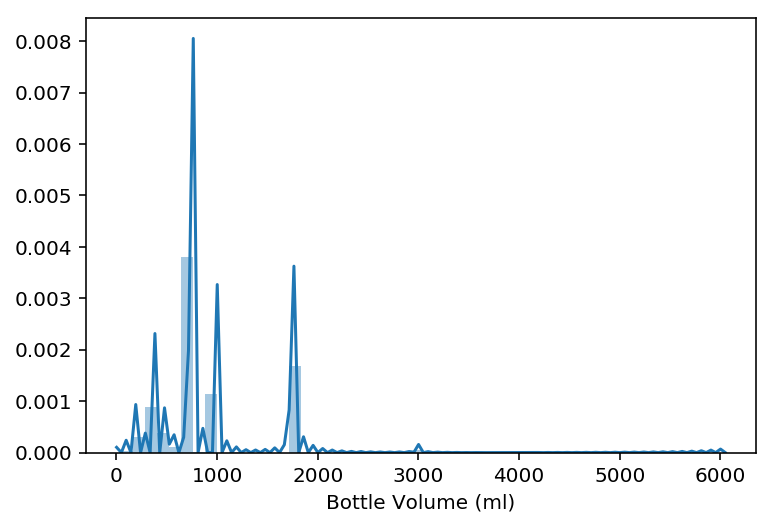

In [20]:
sns.distplot(iowa['Bottle Volume (ml)']);

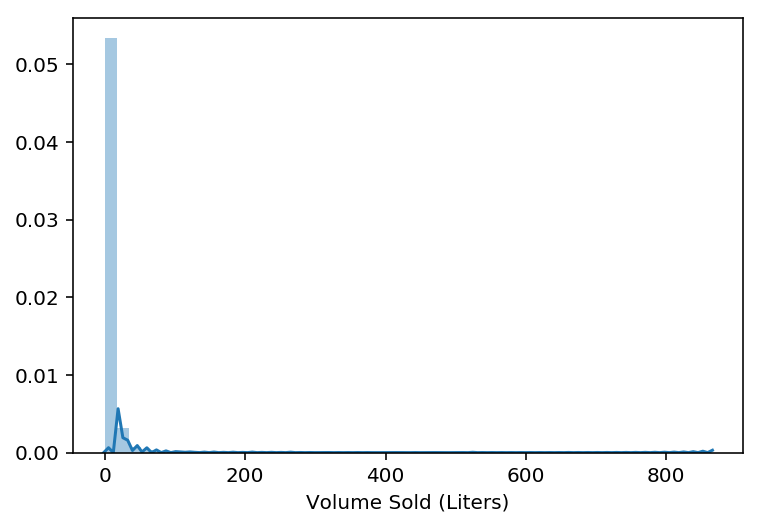

In [21]:
sns.distplot(iowa['Volume Sold (Liters)']);

In [22]:
iowa['Volume Sold (Liters)'].describe()

count    268783.000000
mean          8.364788
std          18.042250
min           0.100000
25%           1.500000
50%           5.250000
75%          10.500000
max         864.000000
Name: Volume Sold (Liters), dtype: float64

In [23]:
iowa[iowa['Volume Sold (Liters)'] > 500].count()

Date                    89
Store Number            89
City                    89
Zip Code                89
County Number           89
County                  89
Category Name           89
Vendor Number           89
Item Number             89
Item Description        89
Bottle Volume (ml)      89
State Bottle Cost       89
State Bottle Retail     89
Bottles Sold            89
Sale (Dollars)          89
Volume Sold (Liters)    89
Year                    89
Month                   89
Quarter                 89
dtype: int64

In [24]:
#Drop 89 observations that are outliers
iowa.drop(iowa[iowa['Volume Sold (Liters)'] > 500].index, inplace=True)

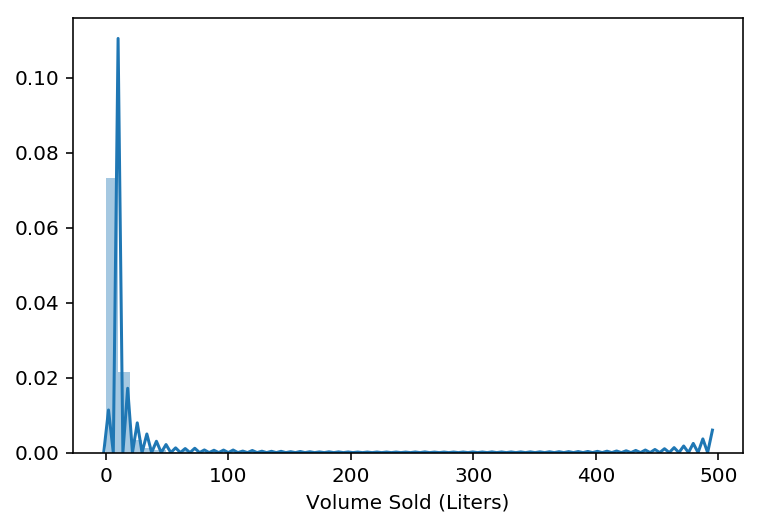

In [25]:
sns.distplot(iowa['Volume Sold (Liters)']);

In [26]:
#Create Profit column
iowa['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) *  iowa['Bottles Sold']

In [27]:
## Total sales (yearly) for each store in 2015 and 2016
pd.pivot_table(iowa, values=['Sale (Dollars)'],index=['Store Number'], columns=['Year'], aggfunc=np.sum).dropna()

Sale (Dollars)          
Year                   2015      2016
Store Number                         
2106              146038.70  30478.75
2113                9310.22   2065.90
2130              106186.31  27856.11
2152                7721.08    904.66
2178               24324.18   5588.50
2190              121689.06  31803.06
2191              104436.69  26856.60
2200               22811.55   4174.87
2228               17462.07   3086.38
2233               29553.34   6522.65
2238               11762.56    409.32
2248               67682.06  13998.44
2285               76927.11  12238.81
2290               56289.66  12448.07
2327               10245.14   2196.57
2353               41545.93   2549.94
2413               90065.02  22925.67
2445                7189.48   1423.37
2448               17740.70   6738.18
2459                7352.33   1803.90
2465               25831.80   5269.80
2475               10681.07   4790.07
2478               19840.65   4462.62
2498                2259.67    780.34
2500              122418.75  33750.09
2501              136175.66  29515.64
2502              131992.85  18874.21
2505               61852.55  14605.93
2506              143431.66  32726.43
2507               29679.78   6147.99
...                     ...       ...
5177                 573.21    325.50
5178                 336.07     83.94
5179                 890.88   1114.89
5180                2239.44   1878.87
5181                 963.04    236.04
5182                2612.94    232.18
5183                 916.80    182.16
5185                1077.39    508.68
5186                 298.86    340.80
5187                4239.11   1389.60
5188                1887.73    726.90
5189                 604.20     68.40
5190                1161.73   1722.91
5191                 303.90    164.76
5192                  90.00     33.60
5196                 682.85    292.28
5198                3985.06   6879.11
5199                2046.22   3250.40
5203                 928.49   2988.03
5204                 790.44   1707.79
5205                  39.02    323.14
5206                 500.90   2211.73
5207                3197.95   5113.35
5212                 504.54    727.18
5213                 180.00    462.38
5215                  56.03   2199.61
9001               13606.02    708.24
9002               31474.44   1382.64
9010                5757.96    177.48
9013                2217.48    361.56

[1274 rows x 2 columns]

In [28]:
## Total sales (yearly) for each store in 2015 and 2016 by Quarter
pd.pivot_table(iowa, index=['Store Number', 'Year', 'Quarter'],values=['Sale (Dollars)'], aggfunc=np.sum).dropna()

Sale (Dollars)
Store Number Year Quarter                
2106         2015 1              39287.29
                  2              31173.46
                  3              38324.77
                  4              37253.18
             2016 1              30478.75
2113         2015 1               2833.25
                  2               1994.30
                  3               2113.56
                  4               2369.11
             2016 1               2065.90
2130         2015 1              24272.57
                  2              29640.49
                  3              24605.88
                  4              27667.37
             2016 1              27856.11
2152         2015 1               2003.46
                  2               1398.92
                  3               2246.70
                  4               2072.00
             2016 1                904.66
2178         2015 1               5856.41
                  2               6986.33
                  3               5668.15
                  4               5813.29
             2016 1               5588.50
2190         2015 1              29452.92
                  2              36029.14
                  3              23420.32
                  4              32786.68
             2016 1              31803.06
...                                   ...
5206         2015 4                500.90
             2016 1               2211.73
5207         2015 4               3197.95
             2016 1               5113.35
5211         2016 1               1210.13
5212         2015 4                504.54
             2016 1                727.18
5213         2015 4                180.00
             2016 1                462.38
5215         2015 4                 56.03
             2016 1               2199.61
9001         2015 1               2341.08
                  2               2234.46
                  3               5347.32
                  4               3683.16
             2016 1                708.24
9002         2015 1               4865.16
                  2              10206.36
                  3              10180.68
                  4               6222.24
             2016 1               1382.64
9010         2015 1               3861.60
                  2               1155.60
                  3                740.76
             2016 1                177.48
9013         2015 2                677.16
                  3                165.12
                  4               1375.20
             2016 1                361.56
9023         2016 1                633.36

[6397 rows x 1 columns]

In [29]:

iowaQ1 = iowa[iowa.Quarter == 1]
iowaQ2 = iowa[iowa.Quarter == 2]
iowaQ3 = iowa[iowa.Quarter == 3]
iowaQ4 = iowa[iowa.Quarter == 4]

#Total Sales for each store in 2015 and 2016 in Q1
pvQ1 = pd.pivot_table(iowaQ1, index=['Store Number','Quarter'], columns=['Year'], values=['Sale (Dollars)'], aggfunc=np.sum).dropna()
pvQ1

Sale (Dollars)          
Year                           2015      2016
Store Number Quarter                         
2106         1             39287.29  30478.75
2113         1              2833.25   2065.90
2130         1             24272.57  27856.11
2152         1              2003.46    904.66
2178         1              5856.41   5588.50
2190         1             29452.92  31803.06
2191         1             29085.57  26856.60
2200         1              4900.43   4174.87
2228         1              5193.97   3086.38
2233         1              5374.55   6522.65
2238         1               858.61    409.32
2248         1             12663.68  13998.44
2285         1             10019.12  12238.81
2290         1             12085.15  12448.07
2327         1              2253.60   2196.57
2353         1              8693.34   2549.94
2413         1             22459.16  22925.67
2445         1              1215.08   1423.37
2448         1              5655.92   6738.18
2459         1              1609.57   1803.90
2465         1              5615.99   5269.80
2475         1              5672.76   4790.07
2478         1              4459.85   4462.62
2498         1               279.22    780.34
2500         1             28421.62  33750.09
2501         1             31412.95  29515.64
2502         1             35073.06  18874.21
2505         1             14559.28  14605.93
2506         1             31009.77  32726.43
2507         1              8344.01   6147.99
...                             ...       ...
5083         1                74.40    492.34
5086         1               810.60   1873.83
5088         1               479.16    430.35
5089         1               884.03    845.83
5090         1              2193.89    978.38
5091         1               523.82    833.09
5092         1              1815.54    988.56
5094         1               511.86    482.82
5096         1              2040.42   1087.62
5097         1              3160.02   1665.66
5098         1              1360.74   2907.37
5099         1              1250.49    171.93
5100         1              2180.76   3322.68
5101         1              1701.47   2787.73
5102         1             27695.76  52025.25
5103         1                42.76    733.19
5104         1              1555.83    317.33
5105         1              2708.56  14971.97
5106         1              2691.84   4430.12
5108         1               999.95   2147.11
5112         1               803.56   1002.24
5113         1              2427.84   1871.03
5114         1               406.02   1064.64
5115         1               601.02    806.10
5116         1              1406.57   4741.18
5119         1               112.50    527.64
5128         1               477.00   6844.46
9001         1              2341.08    708.24
9002         1              4865.16   1382.64
9010         1              3861.60    177.48

[1176 rows x 2 columns]

In [30]:
#Top 10 Stores with higher Sales (all data)
iowa[['Store Number','Sale (Dollars)']].groupby('Store Number').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
Store Number,
4829,1026385.48
2633,734103.14
2512,449931.66
3952,383826.85
3385,334818.08
3773,297914.31
2670,269548.57
3420,250377.96
5102,236355.41


In [31]:
#Top 10 Counties with higher Sales (all data)
iowa[['County','Sale (Dollars)']].groupby('County').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
County,
Polk,6825610.79
Linn,2864691.73
Scott,2311933.10
Johnson,1874912.49
Black Hawk,1842076.07
Woodbury,1154262.05
Pottawattamie,1139362.77
Dubuque,1032545.68
Story,968615.01


# Record your findings

Be sure to write out anything observations from your exploratory analysis.


During cleaning, I dropped out 0.8% of data.
Looks like same Counties are consistent with Higher Sales.

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


In [32]:
#Create column for Q1 Sales
iowa['SalesQ1']=[y if ((x.month >=1) & (x.month <=3)) else 0.0 for x, y in zip(iowa['Date'],iowa['Sale (Dollars)'])]



iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Number,Item Description,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year,Month,Quarter,Profit,SalesQ1
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,4.50,6.75,12,81.00,9.0,2015,11,4,27.00,0.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,BLENDED WHISKIES,395,27605,Tin Cup,...,13.75,20.63,2,41.26,1.5,2016,3,1,13.76,41.26
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,...,12.59,18.89,24,453.36,24.0,2016,2,1,151.20,453.36
3,2016-02-03,2501,AMES,50010,85.0,Story,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,...,9.50,14.25,6,85.50,10.5,2016,2,1,28.50,85.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,VODKA 80 PROOF,297,35918,Five O'clock Vodka,...,7.20,10.80,12,129.60,21.0,2015,8,3,43.20,0.00


In [33]:
#Separate 2015 and 2016 data
iowa_2015=iowa[iowa['Date'].dt.year==2015]
iowa_2016=iowa[iowa['Date'].dt.year==2016]

iowa_2015_Q1 = iowa_2015[iowa.Quarter == 1]


/Users/claugreco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [34]:
#Top 10 Stores with higher Sales in 2015
iowa_2015[['Store Number','Sale (Dollars)']].groupby('Store Number').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
Store Number,
4829,830818.58
2633,610518.46
2512,356955.45
3952,325257.58
3385,287522.00
3773,232066.78
3420,220107.48
2670,215252.96
5102,184330.16


In [35]:
#Top 10 Counties with higher Sales in 2015
iowa_2015[['County','Sale (Dollars)']].groupby('County').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
County,
Polk,5617482.25
Linn,2354520.05
Scott,1927942.14
Johnson,1534653.73
Black Hawk,1517232.31
Woodbury,945960.76
Pottawattamie,928013.39
Dubuque,842677.41
Story,782183.29


In [36]:
#Top 10 Counties with higher Sales in Q1 of 2015
iowa_2015_Q1[['County','Sale (Dollars)']].groupby('County').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
County,
Polk,1217156.24
Linn,517329.11
Scott,411142.55
Black Hawk,336388.08
Johnson,322143.10
Woodbury,208293.79
Pottawattamie,202976.32
Dubuque,183134.89
Story,170775.61


In [37]:
#Top 10 Counties with higher Sales in Q1 of 2016
iowa_2016[['County','Sale (Dollars)']].groupby('County').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
County,
Polk,1208128.54
Linn,510171.68
Scott,383990.96
Johnson,340258.76
Black Hawk,324843.76
Pottawattamie,211349.38
Woodbury,208301.29
Dubuque,189868.27
Story,186431.72


In [38]:
#Checking number of stores
iowa_2016['Store Number'].nunique()

1280

In [39]:
iowa_2015_Q1['Store Number'].nunique()

1260

In [40]:
iowa_2015['Store Number'].nunique()

1370

In [41]:
#Create a list of all stores that were open on Q1 of 2015
stores_Q1 = [store for store in iowa_2015_Q1['Store Number'].unique()]

In [42]:
#Create a new df with all sales in 2015, but only with the stores that were open in Q1.
iowa_new_2015 = iowa_2015.copy()
drop_list = []
for row in iowa_2015.index:
    if iowa_2015.loc[row,'Store Number'] in stores_Q1:
        continue
    else:
        drop_list.append(row)
iowa_new_2015 = iowa_new_2015.drop(drop_list)
iowa_new_2015.shape

(212080, 21)

In [43]:
#2015 data by store
iowa_store_2015=iowa.groupby(iowa_2015['Store Number'],as_index=False).agg({
        'Store Number': lambda x: x.iloc[0],
        'Bottles Sold': np.sum,
        'Volume Sold (Liters)': np.sum,
        'SalesQ1': np.sum,
        'Sale (Dollars)': np.sum
                })

#2015 full but not with new Stores
iowa_store_new_2015=iowa.groupby(iowa_new_2015['Store Number'],as_index=False).agg({
        'Store Number': lambda x: x.iloc[0],
        'Bottles Sold': np.sum,
        'Volume Sold (Liters)': np.sum,
        'SalesQ1': np.sum,
        'Sale (Dollars)': np.sum
                })

#Q1 of 2015 data by store
iowa_store_Q1_2015=iowa.groupby(iowa_2015_Q1['Store Number'],as_index=False).agg({
        'Store Number': lambda x: x.iloc[0],
        'Bottles Sold': np.sum,
        'Volume Sold (Liters)': np.sum,
        'SalesQ1': np.sum,
        'Sale (Dollars)': np.sum
                })


#2016 data by store
iowa_store_2016=iowa.groupby(iowa_2016['Store Number'],as_index=False).agg({
        'Store Number': lambda x: x.iloc[0],
        'Bottles Sold': np.sum,
        'Volume Sold (Liters)': np.sum,
        'SalesQ1': np.sum,
        'Sale (Dollars)': np.sum
                })

iowa_store_2016.head(5)

,Store Number,Bottles Sold,Volume Sold (Liters),SalesQ1,Sale (Dollars)
0,2106,2218,2116.25,30478.75,30478.75
1,2113,159,177.00,2065.90,2065.90
2,2130,1726,1556.90,27856.11,27856.11
3,2152,97,87.50,904.66,904.66
4,2178,480,520.80,5588.50,5588.50


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [44]:
iowa_store_new_2015.corr()

,Store Number,Bottles Sold,Volume Sold (Liters),SalesQ1,Sale (Dollars)
Store Number,1.000000,-0.397807,-0.420601,-0.365152,-0.379301
Bottles Sold,-0.397807,1.000000,0.982360,0.969164,0.984789
Volume Sold (Liters),-0.420601,0.982360,1.000000,0.974132,0.993009
SalesQ1,-0.365152,0.969164,0.974132,1.000000,0.985339
Sale (Dollars),-0.379301,0.984789,0.993009,0.985339,1.000000


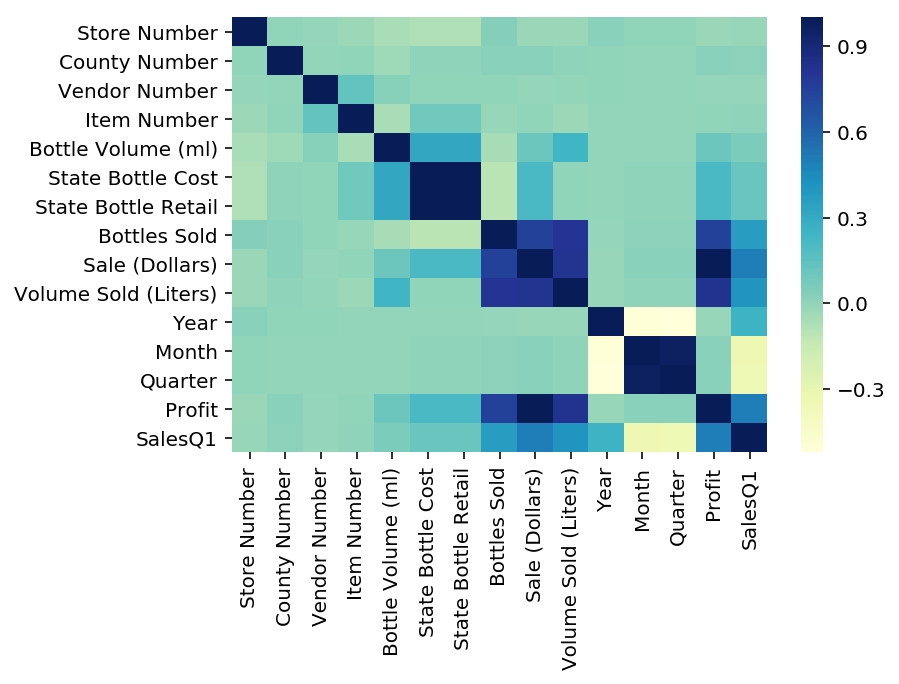

In [45]:
sns.heatmap(iowa.corr(), cmap="YlGnBu");

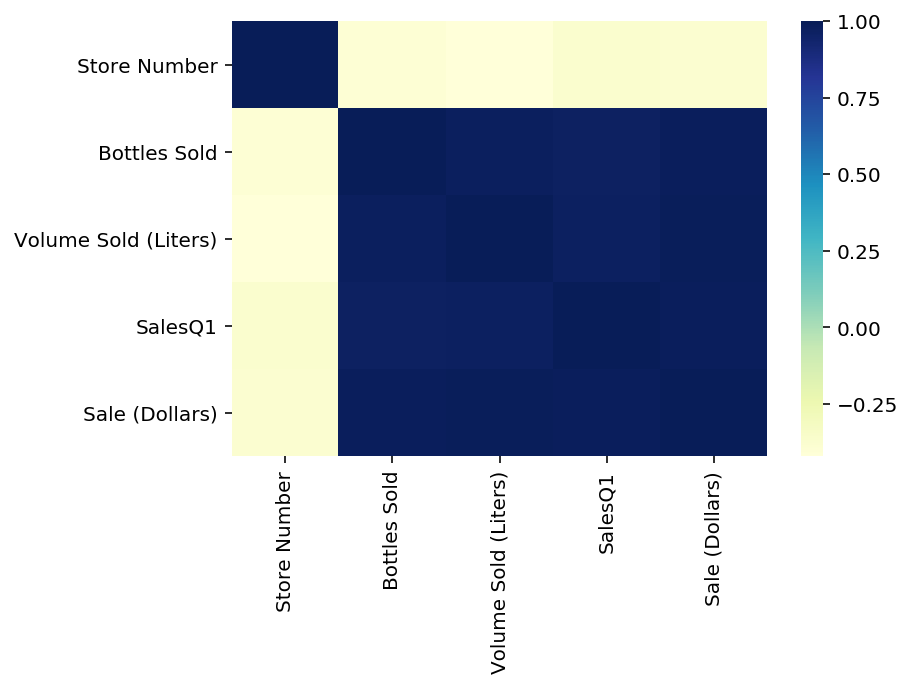

In [46]:
#correlation between features
sns.heatmap(iowa_store_new_2015.corr(), cmap="YlGnBu");

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [47]:
y_2015 = iowa_store_new_2015['Sale (Dollars)']
X_2015 = iowa_store_Q1_2015[['Volume Sold (Liters)', 'Bottles Sold', 'SalesQ1']] 

In [48]:
X_2015.shape

(1260, 3)

In [49]:
y_2015.shape

(1260,)

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2015, y_2015, random_state=1,  train_size=0.5)

#Standarizing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(Xtrain)
Xs_test = ss.transform(Xtest)



model = LinearRegression()
#cross_val= cross_val_score(model,Xs_train, ytrain)    
model.fit (Xs_train, ytrain)
model.coef_
model.intercept_

model_ridge = Ridge(alpha=0.5)
model_ridge.fit (Xs_train, ytrain)

print ('R^2 train Ridge: ', model_ridge.score(Xs_train, ytrain))
#print ('Cross Val: ', cross_val)
print ('R^2 train: ', model.score(Xs_train, ytrain))
print ('Coef: ', model.coef_)
print ('Intercept: ', model.intercept_)
print ('R^2: ', model.score(Xs_test, ytest))

R^2 train Ridge:  0.958404291123
R^2 train:  0.958448551165
Coef:  [ -1792.57631057  -3224.72902406  36964.9742985 ]
Intercept:  18750.2198889
R^2:  0.971678368523


In [51]:
# The model has an R2 of 0.97, which means that the three predictor variables I 
# have chosen explain 97 of the total variability.

In [52]:
from sklearn.metrics import mean_squared_error

y_model = model.predict(Xs_test) 

print('MSE: ', mean_squared_error(ytest, y_model))

MSE:  75403866.2398


# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [53]:
print ('Actual Sales in 2015: ', np.sum(ytest))
print ('Predicted Sales for 2015: ', np.sum(y_model))

Actual Sales in 2015:  13724923.039999995
Predicted Sales for 2015:  13760368.1797


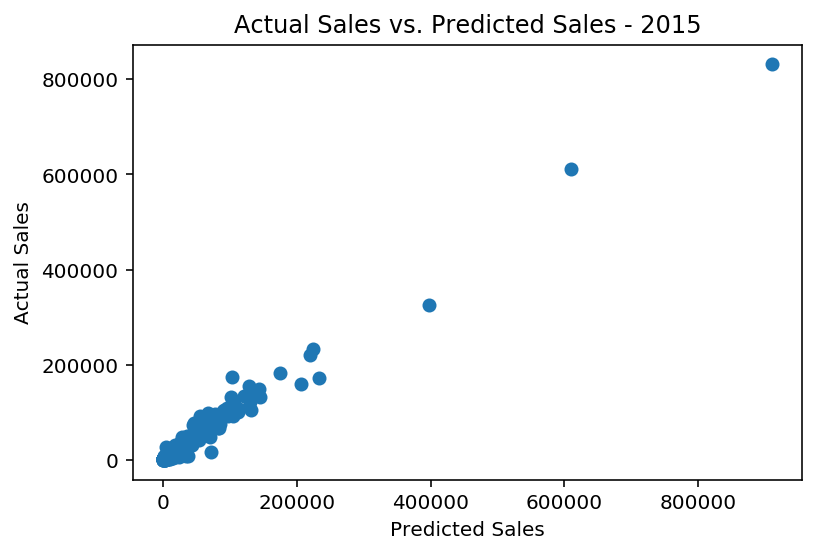

In [54]:
#Actual vs. Predicted Sales for 2015
plt.scatter( y_model, ytest)
plt.title('Actual Sales vs. Predicted Sales - 2015')
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')

plt.show()

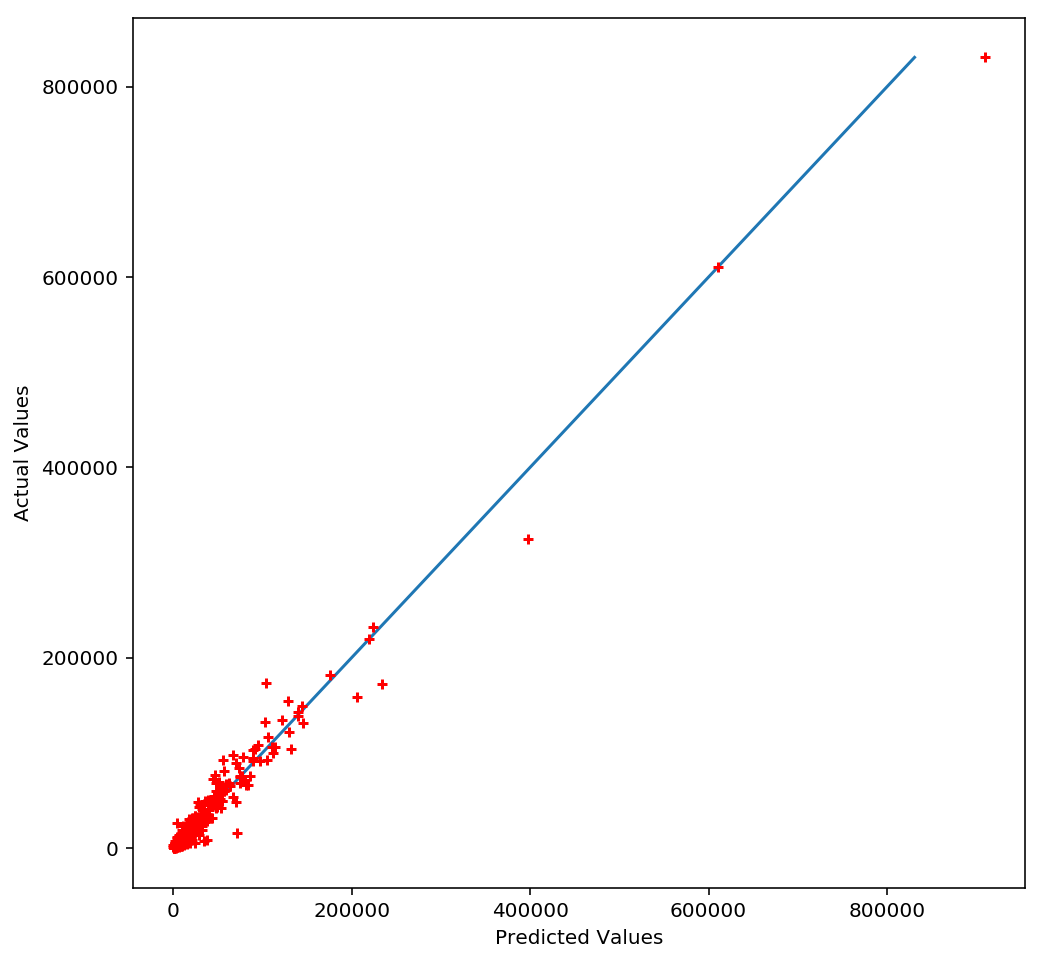

In [55]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(y_model, ytest, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

plt.plot([0, np.max(ytest)], [0, np.max(ytest)])

plt.show()



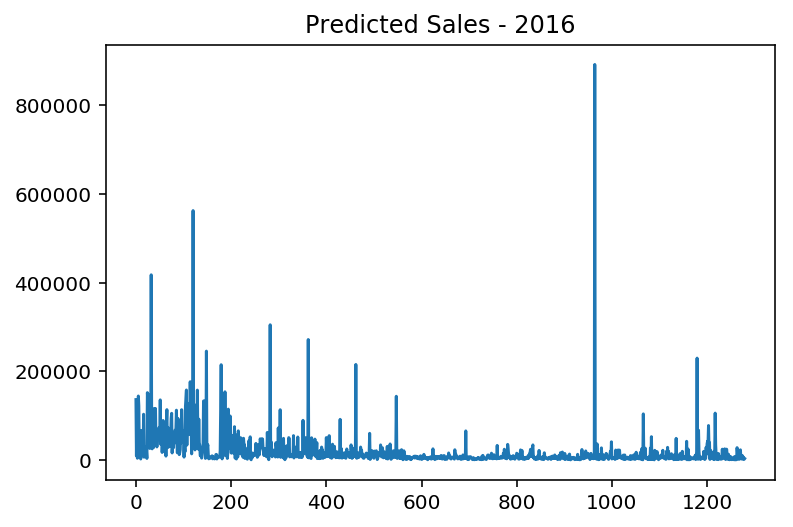

In [56]:
X_2016 = iowa_store_2016[['Volume Sold (Liters)', 'Bottles Sold', 'SalesQ1']]

Xs_2016= ss.transform(X_2016)

prediction_2016 = model.predict(Xs_2016)

#Predicted Sales for 2016
plt.plot(prediction_2016)
plt.title('Predicted Sales - 2016')
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [57]:
print ('Total Sales in 2015: ', sum(iowa_store_new_2015['Sale (Dollars)']))
print ('Total Predicted Sales for 2016: ', np.sum(prediction_2016))

Total Sales in 2015:  25537561.57
Total Predicted Sales for 2016:  25516144.4339


In [58]:
#Writing on files to export to Tableau
iowa_2015.to_csv('output2015.csv')
iowa_2016.to_csv('output2016.csv')

In [59]:
iowa.to_csv('output2015and2016.csv')

In [60]:
print ('Total Sales in Q1 of 2015: ', sum(iowa_store_Q1_2015['Sale (Dollars)']))

Total Sales in Q1 of 2015:  5688700.18


In [61]:
print ('Total Sales in Q1 of 2016: ', sum(iowa_store_2016['Sale (Dollars)']))

Total Sales in Q1 of 2016:  5690382.47
